# 2ª AP de Aprendizado de Máquina

Professor: Regis Pires Magalhães

#### Observações:
- Primeiramente faça uma cópia backup deste arquivo sem suas resoluções.
- A segunda questão vale 1 ponto. As demais questões valem 1,5.
- Desconecte o cabo de rede do computador.
- Somente é permitida consulta à documentação contida na pasta mldocs.
- Não é permitido o uso de pendrive ou qualquer outro meio de armazenamento externo de dados.
- Ao concluir a avaliação, altere o nome do notebook para conter a matricula e o nome do aluno. Somente depois disso, chame o professor para entregar sua resolução, que deverá ser copiada para o pendrive do professor.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors

## 1. Crie manualmente conjuntos de treino e teste para um 3-Fold a partir dos dados a seguir, onde X representa as features, e y representa os labels.

In [3]:
X = np.array([[-3, 1],
              [ 1, 5], 
              [ 1, 2], 
              [-2, 0], 
              [ 2, 3], 
              [-4, 0], 
              [-1, 1], 
              [ 1, 1], 
              [-2, 2]])
y = np.array([0, 2, 2, 1, 2, 0, 1, 2, 0])

### Resposta:
#### 1 Fold:
```python
X_train = ?, y_train = ?
X_test = ?, y_test = ?
```

In [ ]:
X_train = [[-3, 1],
           [ 1, 5], 
           [ 1, 2], 
           [-2, 0], 
           [ 2, 3], 
           [-4, 0]]
y_train = [0, 2, 2, 1, 2, 0]
X_test = [[-1, 1], 
          [ 1, 1], 
          [-2, 2]]
y_test = [1, 2, 0]

#### 2 Fold:
```python
X_train = ?, y_train = ?
X_test = ?, y_test = ?
```

In [ ]:
X_train = [[-2, 0], 
           [ 2, 3], 
           [-4, 0], 
           [-1, 1], 
           [ 1, 1], 
           [-2, 2]]
y_train = [1, 2, 0, 1, 2, 0]
X_test = [[-3, 1],
          [ 1, 5], 
          [ 1, 2]]
y_test = [0, 2, 2]


#### 3 Fold:
```python
X_train = ?, y_train = ?
X_test = ?, y_test = ?
```

In [ ]:
X_train = [[-3, 1],
           [ 1, 5], 
           [ 1, 2], 
           [-1, 1], 
           [ 1, 1], 
           [-2, 2]]
y_train = [0, 2, 2, 1, 2, 0]
X_test = [[-2, 0], 
          [ 2, 3], 
          [-4, 0]]
y_test = [1, 2, 0]

## 2. Desenhe um gráfico de pontos onde, o eixo x é representado pela 1ª coluna de X, o eixo y é presentado pela 2ª coluna de X e os labels 0, 1 e 2 são representados por diferentes cores.

In [7]:
X[:, 0]

array([-3,  1,  1, -2,  2, -4, -1,  1, -2])

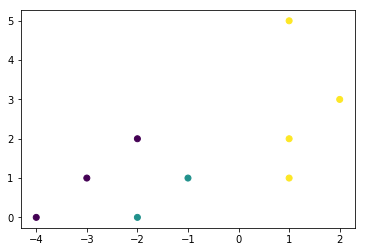

In [45]:
plt.scatter(X[:,0], X[:,1], c=y);

## 3. Dada a amostra [-0.5, 1] e levando em conta as features X e os labels y da questão 1, mas desconsiderando o k-fold, responda: a que classe esta amostra pertence se você usar o kNN com k=2? Prove usando a distância euclidiana entre os 2 pontos visualmente mais próximos. Não é necessário executar a implementação do algoritmo kNN.

In [11]:
from sklearn.metrics.pairwise import euclidean_distances

In [66]:
ed = euclidean_distances(X, [[-.5, 1]])
ed = ed[:, 0]
print(np.sort(ed))

[0.5        1.5        1.80277564 1.80277564 1.80277564 2.5
 3.20156212 3.64005494 4.27200187]


### A amostra pode pertencer as classes 0 ou 1
  *  Notamos que os dois pontos mais próximos são [-1, 1] da classe 1 e [-3, 1] da classe 0 com 0.5 e 1.5 de distância respectivamente.
  *  Como os dois mais proximos são de classes distintas ele irá escolher aleatóriamente dentre as classes, portanto, as classes 0 ou 1

# >>> Classes 1 e 2. Pontos [-1,1] e [1, 1]

## 4. Dado o dataframe df_jogo a seguir, que relaciona o tempo com jogar (1) ou não jogar (0), calcule manualmente a probabilidade de não jogar, dado que está chuvendo.

In [67]:
tempo = np.array(['sol', 'nuvens', 'chuva', 'sol', 'sol', 'nuvens', 'chuva', 'chuva', 'sol', 'chuva'])
jogar = np.array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1])
df_jogo = pd.DataFrame({'tempo': tempo, 'jogar': jogar})
df_jogo

,tempo,jogar
0,sol,0
1,nuvens,1
2,chuva,1
3,sol,1
4,sol,1
5,nuvens,1
6,chuva,0
7,chuva,0
8,sol,1
9,chuva,1


In [68]:
# P(não/chove) = P(chove/não) * P(não) / P(chuva)
(2/3 * 3/9) / (4/9)

0.5

## 5. Transforme o dataframe df_jogo para que a feature categórica não ordenada 'tempo' possa ser melhor usada de modo geral por algoritmos de aprendizado de máquina. No final, você deve ter um dataframe chamado df_transform.

In [69]:
df_jogo = pd.get_dummies(df_jogo, drop_first=True)
df_jogo

,jogar,tempo_nuvens,tempo_sol
0,0,0,1
1,1,1,0
2,1,0,0
3,1,0,1
4,1,0,1
5,1,1,0
6,0,0,0
7,0,0,0
8,1,0,1
9,1,0,0


## 6. Dados os 3 pontos a seguir, calcule as distâncias euclidiana, manhattan e chebyshev entre o primeiro e o último ponto.

In [73]:
X = np.array([ [0,1], [2,6], [3,2] ])

In [72]:
from sklearn.neighbors import DistanceMetric

In [76]:
dist = DistanceMetric.get_metric('euclidean')
dist.pairwise([[0,1]],[[3,2]])

array([[3.16227766]])

In [77]:
dist = DistanceMetric.get_metric('manhattan')
dist.pairwise([[0,1]],[[3,2]])

array([[4.]])

In [79]:
dist = DistanceMetric.get_metric('chebyshev')
dist.pairwise([[0,1]],[[3,2]])

array([[3.]])

## 7. Avalie e compare a acurácia dos algoritmos Logistic Regression, GassianNB, SVM e kNN usando os dados de treino e teste a seguir.

X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [81]:
X, y = datasets.load_breast_cancer(return_X_y=True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42) 
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(426, 30) (426,) (143, 30) (143,)


In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [86]:
models = {}
models['LR'] = {'model': LogisticRegression(multi_class='auto', solver='lbfgs'), 'pred':[], 'acc': -1}
models['GNB'] = {'model': GaussianNB(), 'pred':[], 'acc': -1}
models['SVM'] = {'model': SVC(), 'pred':[], 'acc': -1}
models['KNN'] = {'model': KNeighborsClassifier(n_neighbors=5), 'pred':[], 'acc': -1}

In [87]:
from sklearn.metrics import accuracy_score

In [89]:
for i in models:
    models[i]['model'].fit(X_train, y_train)
    models[i]['pred'] = models[i]['model'].predict(X_test)
    models[i]['acc'] = accuracy_score(y_test, models[i]['pred'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [95]:
for i in models:
    print(i+ '\t->\t' + str(models[i]['acc']))

LR	->	0.951048951048951
GNB	->	0.9370629370629371
SVM	->	0.6293706293706294
KNN	->	0.9300699300699301
